In [ ]:
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt


In [ ]:
pickle_in=open('/content/drive/My Drive/class Project/balanced_image_data.pickle','rb')
dataset=pickle.load(pickle_in)
pickle_in.close()



picke_in=open('/content/drive/My Drive/class Project/balanced_label.pickle','rb')
label=pickle.load(picke_in)
pickle_in.close()

In [ ]:

dataset=np.array(dataset)
label=np.array(label)


print(dataset.shape)
print(label.shape)

CATEGORIES=['COVID','NORMAL','PNEUMONIA']

(10342, 100, 100)
(10342,)


In [ ]:
#counting the unique value in daatset
x,y=np.unique(label,return_counts=True)
for a,b in zip(x,y):
  print(CATEGORIES[a],' -- > ',b)

COVID  -- >  3433
NORMAL  -- >  3519
PNEUMONIA  -- >  3390


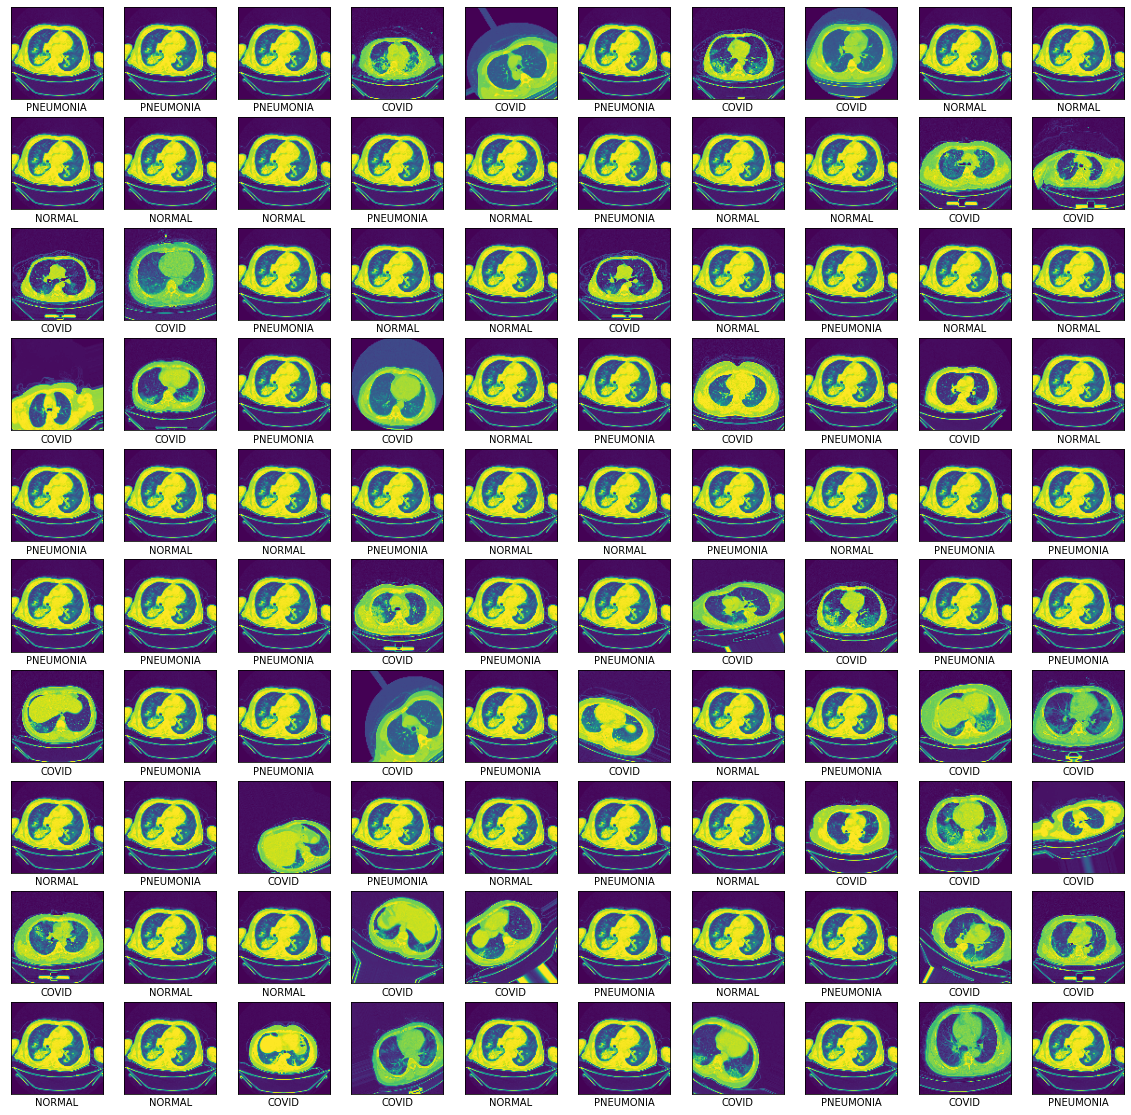

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(dataset[i])
  plt.xlabel(CATEGORIES[label[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
import tensorflow as tf
from tensorflow import keras

## DATA SPLIT AND NORMALIZATION

In [ ]:
#data split and normalization

print(dataset.shape)
print(label.shape)
print(label[0])

(10342, 100, 100)
(10342,)
2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,label,test_size=.1,stratify=label,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9307, 100, 100)
(9307,)
(1035, 100, 100)
(1035,)


In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
y_train1=keras.utils.to_categorical(y_train)
y_test1=keras.utils.to_categorical(y_test)

In [ ]:
train_images=X_train.reshape((-1,10000))
test_images=X_test.reshape((-1,10000))
print(train_images.shape)
print(test_images.shape)

(9307, 10000)
(1035, 10000)


### Trying different MLP to find the best results

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [ ]:
model=keras.Sequential()
model.add(Dense(150,activation='relu',input_shape=(10000,)))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1500150   
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2432      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

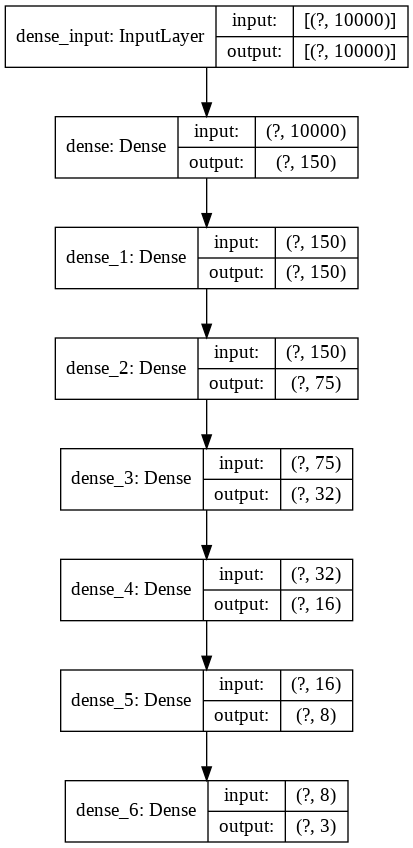

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.fit(train_images,y_train1,batch_size=50,validation_split=0.1)
print(train_images.shape)
print(y_train1.shape)

(9307, 10000)
(9307, 3)


In [ ]:
model.fit(train_images,y_train1,epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
262/262 [==============================] - 1s 5ms/step - loss: 0.5991 - accuracy: 0.6361 - val_loss: 0.4680 - val_accuracy: 0.6380
Epoch 2/50
262/262 [==============================] - 1s 4ms/step - loss: 0.4823 - accuracy: 0.6627 - val_loss: 0.4686 - val_accuracy: 0.6380
Epoch 3/50
262/262 [==============================] - 1s 4ms/step - loss: 0.4782 - accuracy: 0.6710 - val_loss: 0.4814 - val_accuracy: 0.6369
Epoch 4/50
262/262 [==============================] - 1s 4ms/step - loss: 0.5596 - accuracy: 0.6439 - val_loss: 0.4693 - val_accuracy: 0.6380
Epoch 5/50
262/262 [==============================] - 1s 4ms/step - loss: 0.4730 - accuracy: 0.6705 - val_loss: 0.4715 - val_accuracy: 0.6380
Epoch 6/50
262/262 [==============================] - 1s 4ms/step - loss: 0.4760 - accuracy: 0.6581 - val_loss: 0.4712 - val_accuracy: 0.6971
Epoch 7/50
262/262 [==============================] - 1s 4ms/step - loss: 0.4757 - accuracy: 0.6651 - val_loss: 0.4637 - val_accuracy: 0.6971
Epoch 

### model accuracy is very less lets try to add more number of layers with more number of neurons in each layer

In [ ]:
model2=keras.Sequential()
model2.add(Dense(500,activation='relu',input_shape=(10000,)))
model2.add(Dense(300,activation='relu'))
model2.add(Dense(150,activation='relu'))
model2.add(Dense(150,activation='relu'))
model2.add(Dense(75,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(3,activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               5000500   
_________________________________________________________________
dense_12 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_13 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_14 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_15 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2432      
_________________________________________________________________
dense_17 (Dense)             (None, 16)               

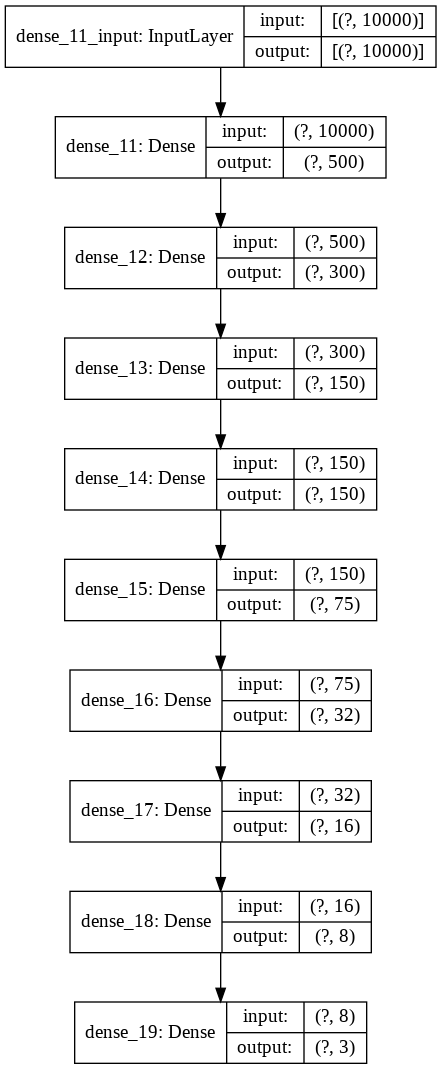

In [ ]:
keras.utils.plot_model(model2,show_shapes=True)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.02)
model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(train_images,y_train1,epochs=100,verbose=1,validation_split=0.1)

Epoch 1/100
262/262 [==============================] - 1s 5ms/step - loss: 4.2680 - accuracy: 0.3274 - val_loss: 1.0984 - val_accuracy: 0.3609
Epoch 2/100
262/262 [==============================] - 1s 5ms/step - loss: 1.0999 - accuracy: 0.3325 - val_loss: 1.0965 - val_accuracy: 0.3609
Epoch 3/100
262/262 [==============================] - 1s 5ms/step - loss: 1.1003 - accuracy: 0.3372 - val_loss: 1.0991 - val_accuracy: 0.3373
Epoch 4/100
262/262 [==============================] - 1s 5ms/step - loss: 1.1003 - accuracy: 0.3330 - val_loss: 1.0987 - val_accuracy: 0.3609
Epoch 5/100
262/262 [==============================] - 1s 5ms/step - loss: 1.1000 - accuracy: 0.3301 - val_loss: 1.0965 - val_accuracy: 0.3609
Epoch 6/100
262/262 [==============================] - 1s 5ms/step - loss: 1.0999 - accuracy: 0.3337 - val_loss: 1.0972 - val_accuracy: 0.3609
Epoch 7/100
262/262 [==============================] - 1s 5ms/step - loss: 1.0997 - accuracy: 0.3281 - val_loss: 1.1017 - val_accuracy: 0.3018

### adding dropout layers with batch normalizatoin and using glot_NORMAL in kernel initializers

In [ ]:
from keras.layers import BatchNormalization,Dropout,Dense

In [ ]:
model3=keras.Sequential()
initializers=tf.initializers.GlorotNormal()
model3.add(Dense(300,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))
model3.add(Dense(150,activation='relu',kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))

model3.add(Dense(100,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))

model3.add(Dense(75,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))
model3.add(Dense(50,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))
model3.add(Dense(25,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))
model3.add(Dense(12,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model3.add(BatchNormalization(axis=1))
model3.add(Dropout(0.3))
model3.add(Dense(3,activation='softmax',input_shape=(10000,),kernel_initializer=initializers))



In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               3000300   
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_4 (Batch (None, 150)               600       
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

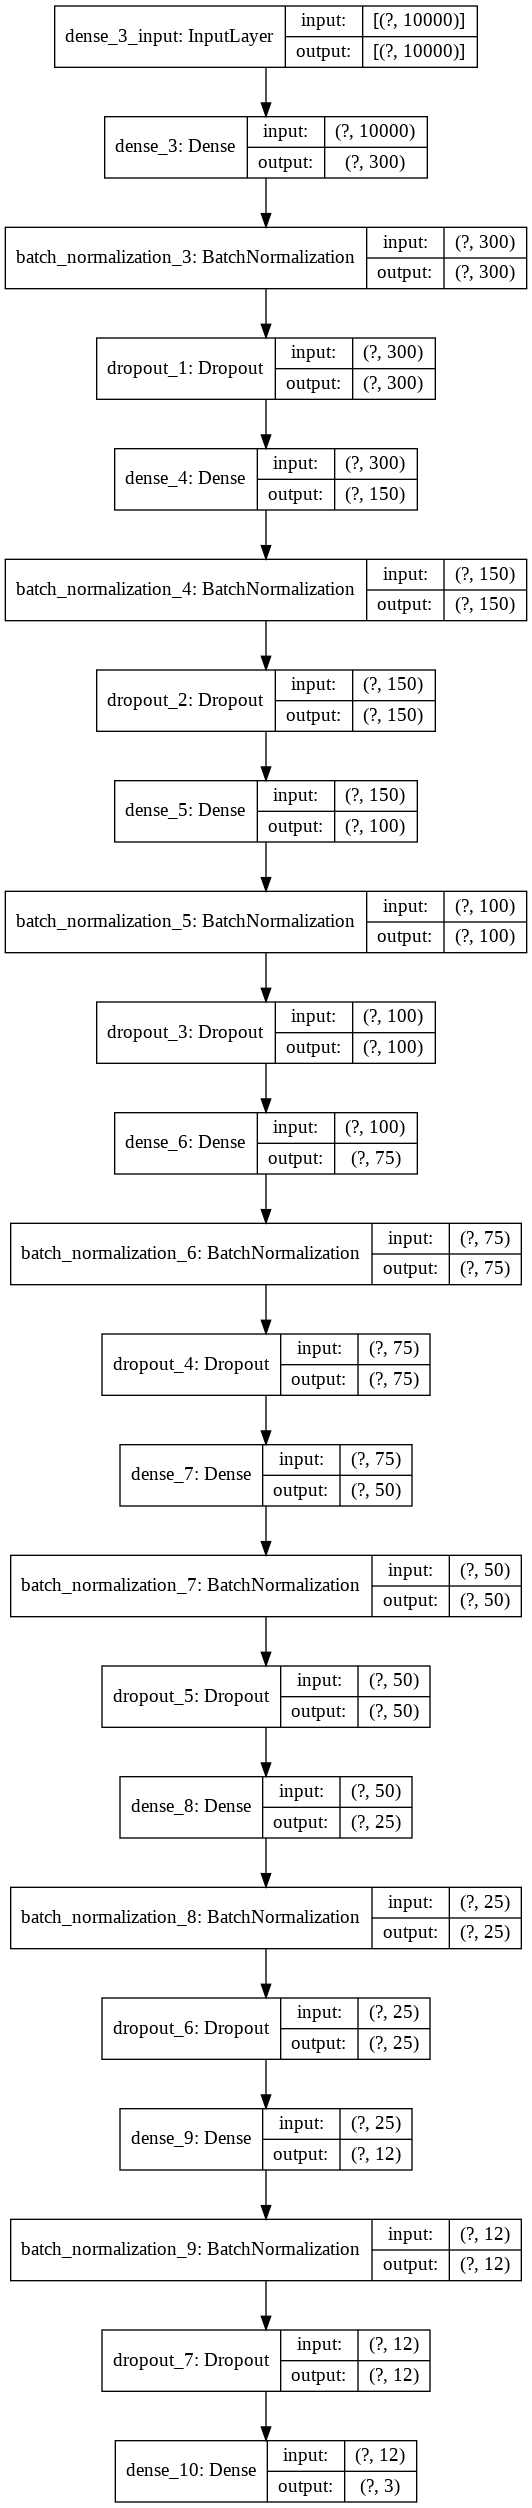

In [ ]:
keras.utils.plot_model(model3,show_shapes=True)

In [ ]:
model3.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(train_images,y_train1,epochs=100,validation_split=0.15,verbose=1)

Epoch 1/100
248/248 [==============================] - 2s 9ms/step - loss: 0.9974 - accuracy: 0.5383 - val_loss: 0.5947 - val_accuracy: 0.6858
Epoch 2/100
248/248 [==============================] - 2s 8ms/step - loss: 0.6188 - accuracy: 0.6430 - val_loss: 0.4715 - val_accuracy: 0.6872
Epoch 3/100
248/248 [==============================] - 2s 8ms/step - loss: 0.5432 - accuracy: 0.6534 - val_loss: 0.4657 - val_accuracy: 0.6872
Epoch 4/100
248/248 [==============================] - 2s 8ms/step - loss: 0.5251 - accuracy: 0.6532 - val_loss: 0.4648 - val_accuracy: 0.6507
Epoch 5/100
248/248 [==============================] - 2s 8ms/step - loss: 0.5011 - accuracy: 0.6599 - val_loss: 0.4608 - val_accuracy: 0.6872
Epoch 6/100
248/248 [==============================] - 2s 8ms/step - loss: 0.4915 - accuracy: 0.6626 - val_loss: 0.4625 - val_accuracy: 0.6872
Epoch 7/100
248/248 [==============================] - 2s 8ms/step - loss: 0.4890 - accuracy: 0.6530 - val_loss: 0.4631 - val_accuracy: 0.6872

In [ ]:
#model.save('/content/drive/My Drive/class Project/class/MLPmodel3')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/class Project/class/MLPmodel3/assets


In [ ]:
model3.save('/content/drive/My Drive/class Project/class/Model3_68.h5')

In [ ]:
model3.evaluate(test_images,y_test1)

33/33 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.6725


[0.46274352073669434, 0.6724637746810913]

In [ ]:
test_images[0].shape

(10000,)

In [ ]:
a=model3.predict(test_images)

In [ ]:
a=test_images[0]
print(a.shape)

(10000,)


In [ ]:
model4=keras.Sequential()
initializers=tf.initializers.GlorotNormal()
model4.add(Dense(500,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(300,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(150,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(150,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))

model4.add(Dense(100,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))

model4.add(Dense(75,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(50,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(25,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(12,activation='relu',kernel_initializer=initializers))
model4.add(BatchNormalization(axis=1))
model4.add(Dropout(0.3))
model4.add(Dense(3,activation='softmax',kernel_initializer=initializers))



In [ ]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 500)               5000500   
_________________________________________________________________
batch_normalization_18 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_19 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 150)              

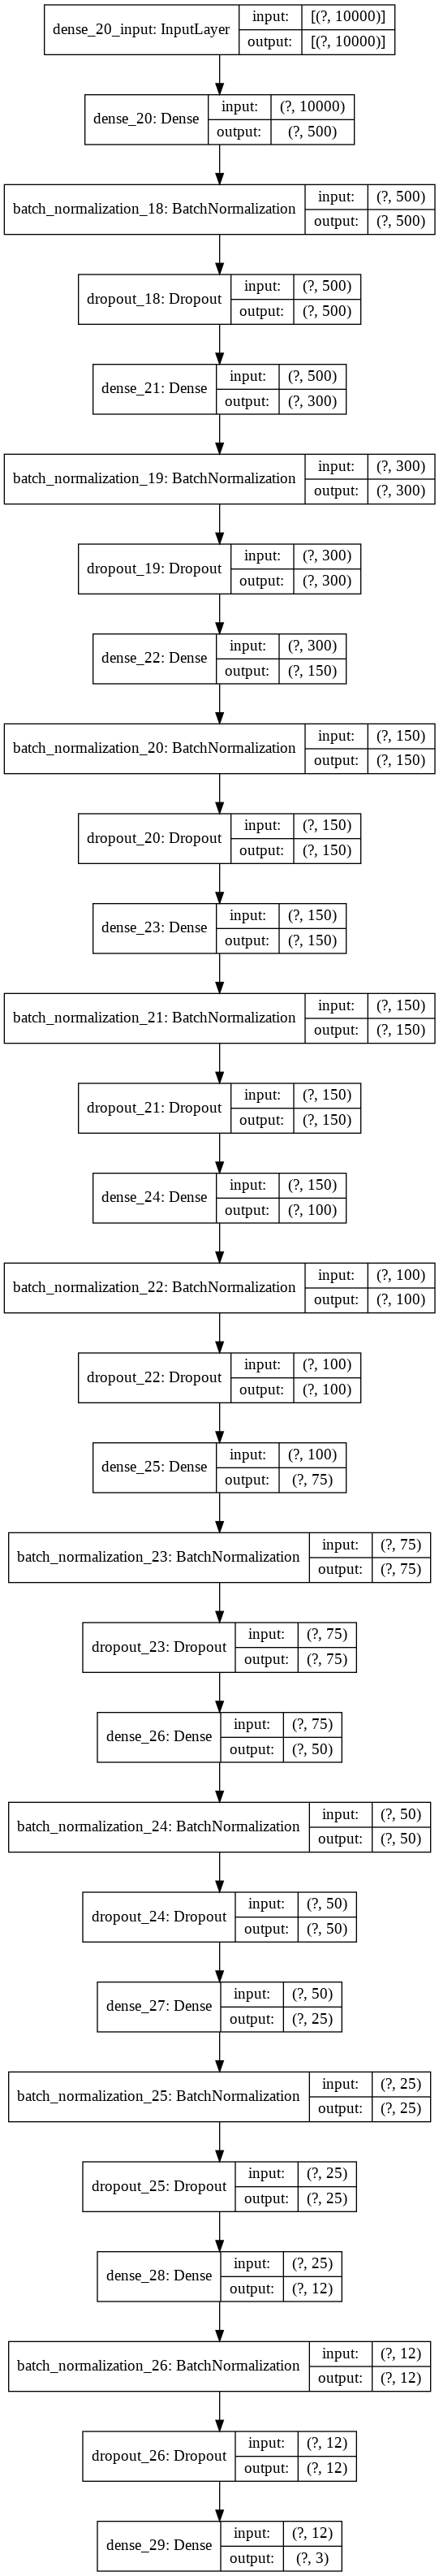

In [ ]:
keras.utils.plot_model(model4,show_shapes=True)

In [ ]:
model4.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist4=model4.fit(train_images,y_train1,epochs=100,verbose=1,validation_split=0.1)

Epoch 1/100
262/262 [==============================] - 3s 11ms/step - loss: 0.8419 - accuracy: 0.5647 - val_loss: 0.4917 - val_accuracy: 0.6348
Epoch 2/100
262/262 [==============================] - 3s 10ms/step - loss: 0.5652 - accuracy: 0.6501 - val_loss: 0.4687 - val_accuracy: 0.6971
Epoch 3/100
262/262 [==============================] - 3s 10ms/step - loss: 0.5189 - accuracy: 0.6601 - val_loss: 0.4696 - val_accuracy: 0.6380
Epoch 4/100
262/262 [==============================] - 3s 10ms/step - loss: 0.4970 - accuracy: 0.6663 - val_loss: 0.4660 - val_accuracy: 0.6971
Epoch 5/100
262/262 [==============================] - 3s 10ms/step - loss: 0.4981 - accuracy: 0.6614 - val_loss: 0.4659 - val_accuracy: 0.6971
Epoch 6/100
262/262 [==============================] - 3s 12ms/step - loss: 0.4890 - accuracy: 0.6645 - val_loss: 0.4655 - val_accuracy: 0.6971
Epoch 7/100
262/262 [==============================] - 3s 10ms/step - loss: 0.4920 - accuracy: 0.6590 - val_loss: 0.4648 - val_accuracy:

In [ ]:
model4.evaluate(test_images,y_test1)

33/33 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.6599


[0.4631536900997162, 0.6599034070968628]

THIS model gives accuracy around 65% which is less so lets instad of taking images of dimensions of (100x100) lets try the model with images size 200x200 to see whether it increase the accuracy or not

> Indented block




In [ ]:
model4.save('/content/drive/My Drive/class Project/class/model4MLP67')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/class Project/class/model4MLP67/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


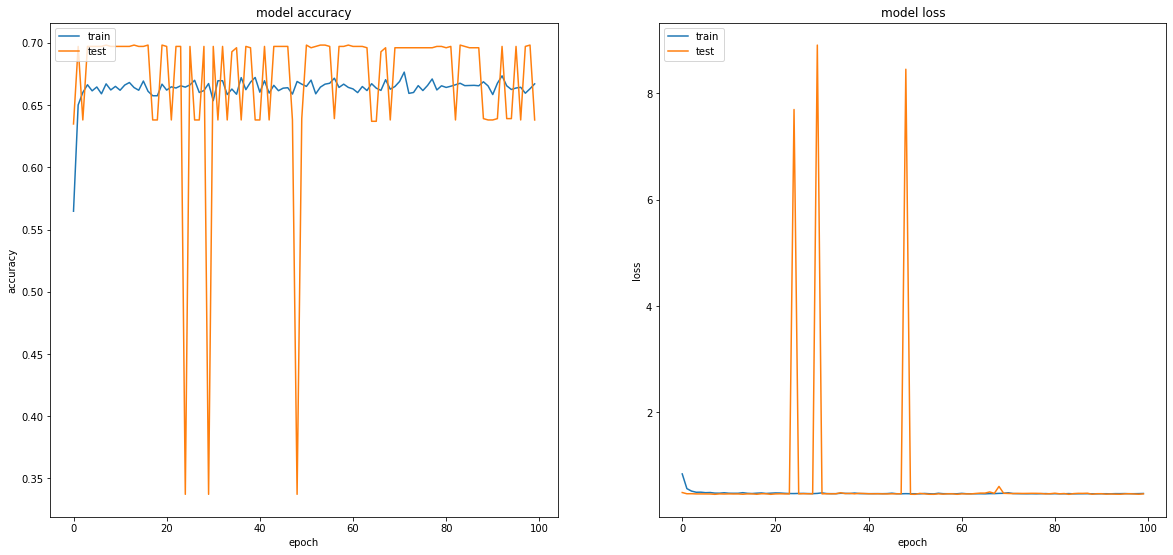

In [ ]:
print(hist4.history.keys())
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,2,2)
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pickle_in=open('/content/drive/My Drive/class Project/balanced_image_data_CNN.pickle','rb')
dataset2=pickle.load(pickle_in)
pickle_in.close()


pickle_in=open('/content/drive/My Drive/class Project/balanced_label_CNN.pickle','rb')
label2=pickle.load(pickle_in)
pickle_in.close()

In [ ]:
dataset2=np.array(dataset2)
label2=np.array(label2)

In [ ]:
print(dataset2.shape)
print(label2.shape)

(10342, 200, 200)
(10342,)


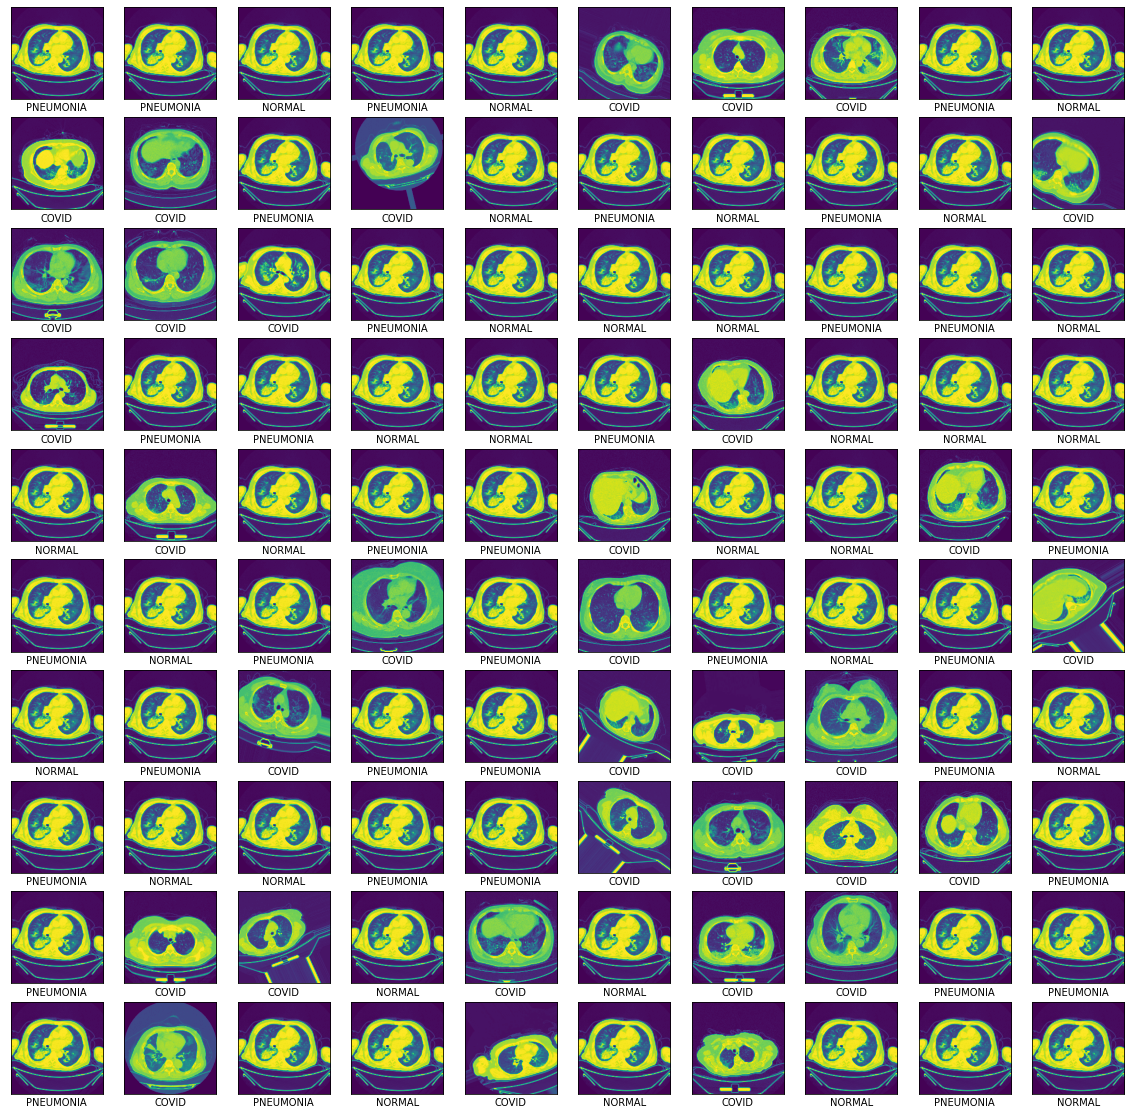

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(dataset2[i])
  plt.xlabel(CATEGORIES[label2[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(dataset2,label2,test_size=0.1,random_state=0,stratify=label2)

In [ ]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(9307, 200, 200)
(1035, 200, 200)
(9307,)
(1035,)


In [ ]:
a,b=np.unique(y2_train,return_counts=True)
for x,y in zip(a,b):
  print(CATEGORIES[x],'--->',y)

COVID ---> 3089
NORMAL ---> 3167
PNEUMONIA ---> 3051


# NORMALIZING THE DATA ANd RESHAPING IT

In [ ]:
X2_train,X2_test=X2_train/255.0,X2_test/255.0

In [ ]:
X2_train=X2_train.astype('float32')

In [ ]:
X2_test=X2_test.astype('float32')

In [ ]:
y2_train=keras.utils.to_categorical(y2_train)
y2_test=keras.utils.to_categorical(y2_test)

In [ ]:
X2_train=X2_train.reshape((-1,40000))

In [ ]:
X2_train.shape

(9307, 40000)

In [ ]:
X2_test=X2_test.reshape((-1,40000))

In [ ]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(9307, 40000)
(1035, 40000)
(9307, 3)
(1035, 3)


array([0.22745098, 0.23137255, 0.23529412, ..., 0.21568628, 0.21568628,
       0.21568628], dtype=float32)

In [ ]:
model5=keras.Sequential()
initializers=tf.initializers.GlorotNormal()
model5.add(Dense(1000,activation='relu',input_shape=(10000,),kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(500,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(500,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(300,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(300,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(150,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(150,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))

model5.add(Dense(100,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))

model5.add(Dense(75,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(50,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(25,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(12,activation='relu',kernel_initializer=initializers))
model5.add(BatchNormalization(axis=1))
model5.add(Dropout(0.3))
model5.add(Dense(3,activation='softmax',kernel_initializer=initializers))


In [ ]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
batch_normalization_9 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
batch_normalization_10 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)              

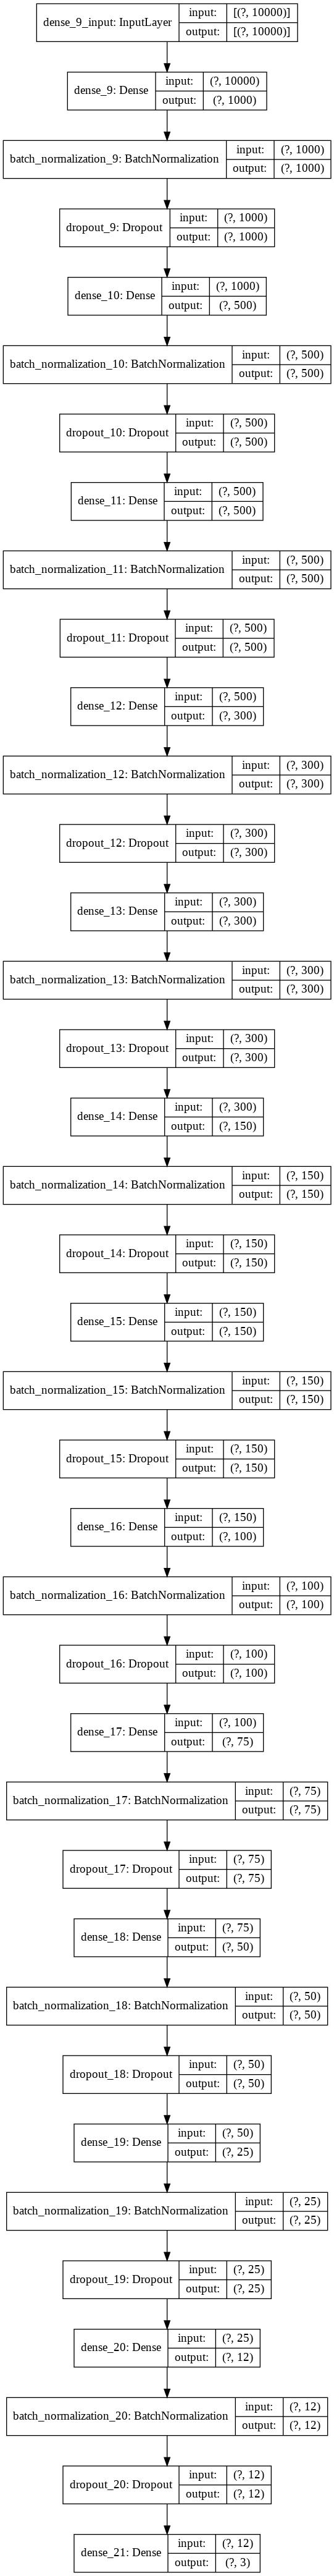

In [ ]:
keras.utils.plot_model(model5,show_shapes=True,to_file='/content/drive/My Drive/class Project/class/MLP_final.jpg')

In [ ]:
model5.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist5=model5.fit(train_images,y_train1,epochs=100,verbose=1,validation_split=0.1)

Epoch 1/100
262/262 [==============================] - 4s 15ms/step - loss: 0.8937 - accuracy: 0.5511 - val_loss: 0.4970 - val_accuracy: 0.6960
Epoch 2/100
262/262 [==============================] - 4s 14ms/step - loss: 0.5623 - accuracy: 0.6433 - val_loss: 0.4693 - val_accuracy: 0.6971
Epoch 3/100
262/262 [==============================] - 3s 13ms/step - loss: 0.5147 - accuracy: 0.6639 - val_loss: 0.4701 - val_accuracy: 0.6380
Epoch 4/100
262/262 [==============================] - 3s 13ms/step - loss: 0.5112 - accuracy: 0.6570 - val_loss: 0.4676 - val_accuracy: 0.6971
Epoch 5/100
262/262 [==============================] - 3s 13ms/step - loss: 0.5173 - accuracy: 0.6618 - val_loss: 0.4673 - val_accuracy: 0.6971
Epoch 6/100
262/262 [==============================] - 4s 13ms/step - loss: 0.4975 - accuracy: 0.6585 - val_loss: 0.4659 - val_accuracy: 0.6971
Epoch 7/100
262/262 [==============================] - 4s 14ms/step - loss: 0.4951 - accuracy: 0.6603 - val_loss: 0.4660 - val_accuracy:

In [ ]:
model5.evaluate(test_images,y_test1)

33/33 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.6725


[0.46277979016304016, 0.6724637746810913]

In [ ]:
model5.save('/content/drive/My Drive/class Project/class/model5MLP67')

INFO:tensorflow:Assets written to: /content/drive/My Drive/class Project/class/model5MLP67/assets


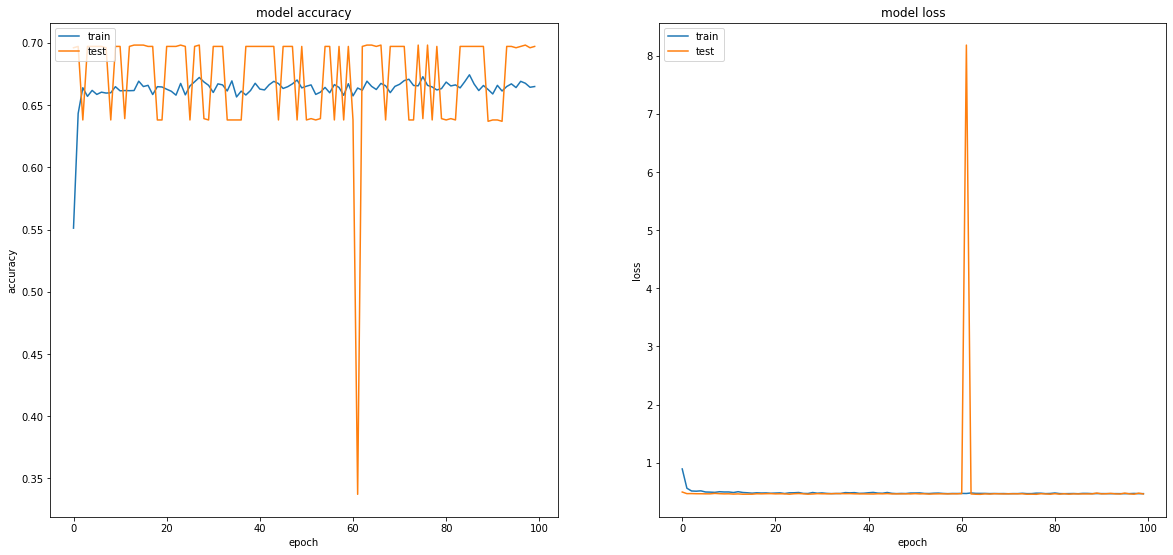

In [ ]:
#print(hist5.history.keys())
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,2,2)
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
pred = model5.predict(test_images)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test1, axis=1), predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       0.51      1.00      0.67       352
           2       0.00      0.00      0.00       339

    accuracy                           0.67      1035
   macro avg       0.50      0.67      0.56      1035
weighted avg       0.51      0.67      0.56      1035



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
